<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/scikit_learn_introduction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

[Scikit-learn](https://scikit-learn.org/) (often referred to as sklearn) provides a wide array of statistical models and machine learning algorithms. Although it is written in Python, sklearn’s performance is attributed to its usage of NumPy for high-performance linear algebra and array operations. Furthermore, some core algorithms are written in [Cython](https://en.wikipedia.org/wiki/Cython) to improve performance. 

In this notebook, **a (minimal) introduction to scikit-learn for regression** tasks will be given.

# Introduction to regression

In scikit-learn, an estimator is an object that fits a model based on the training data and it can be later use to perform predictions on new, unseen data. An estimator can be a regressor or a classifier. In the previous notebook, we have seen an estimator for classification purposes. In this notebook, we will cover how to use an estimator for regression purposes.
The difference between classification and regression is:
*   If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a classification task. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. 
*   If the goal is to predict a continuous target variable, it is said to be a regression task. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

More info about this can be checked [here](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction).

Scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the diabetes dataset for regression. In this sense, in the previous notebook we have introduced the iris dataset. In next notebooks, we will cover both the digits (for classification) and the diabetes (for regression) datasets. 

In this notebook, we will be using a very simple dataset, which will be introduced in the next section.



# Training and testing sets

We are going to create a dataset with `N` points. Additionally, we are going to introduce some random noise to each point in the dataset. See the code below and the visualization of the dataset to see the final created points. Note that we make use of several NumPy operations to create this dataset (e.g. `np.linspace()`, `np.reshape()`, `np.random.uniform()`) for practicing. In this sense, a more practical approach is to make use of [sklearn.datasets.make_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression), which generates a random regression problem. In a similar way, you can use [`sklearn.datasets.make_classification()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for generating a random n-class classification problem.



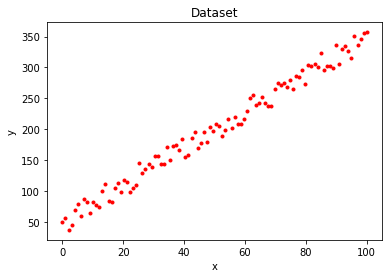

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### 1) First point is to define the data:
# Number of points, error, slope and intercept factor:
N = 100
ERROR = 20
SLOPE = 3
INTERCEPT = 50

# Make random numbers predictable:
np.random.seed(101)
# Generate random data composed by N points:
x = np.linspace(0, N, N).reshape(-1, 1)
y = (SLOPE * np.linspace(0, N, N) + np.random.uniform(-ERROR, ERROR, N) + INTERCEPT).reshape(-1, 1)

### 2) Plot the training data:
# Plot training data:
plt.plot(x, y, 'r.', label='Original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset")

# Show the Figure:
plt.show()

[Extracted from the documentation](https://scikit-learn.org/stable/tutorial/basic/tutorial.html): "*Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties*". Therefore, at this point, we split the data set, which was defined above, into training and testings sets using `train_test_split()`.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print("x size: {}".format(x.shape))
print("x_train size: {}".format(x_train.shape))
print("x_test size: {}".format(x_test.shape))

x size: (100, 1)
x_train size: (80, 1)
x_test size: (20, 1)


We can visualize all the original data, and both the training and testing sets in the same figure.

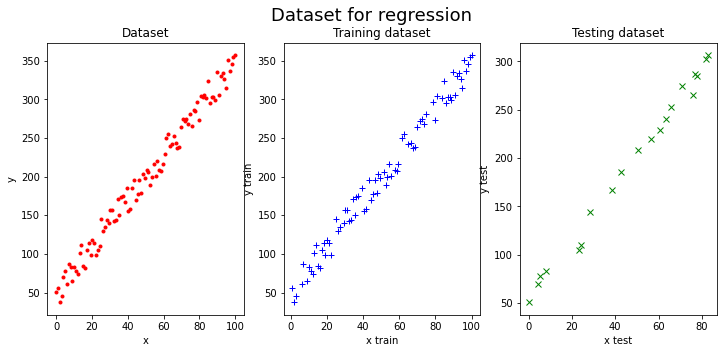

In [6]:
# Set size and title of the figure:
plt.figure(figsize=(12,5))
plt.suptitle('Dataset for regression', fontsize=18)

# Show the original dataset:
plt.subplot(1, 3, 1)
plt.plot(x, y, 'r.', label='Original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset")

# Show the training data:
plt.subplot(1, 3, 2)
plt.plot(x_train, y_train, 'b+', label='Training data')
plt.xlabel('x train')
plt.ylabel('y train')
plt.title("Training dataset")

# Show the testing data:
plt.subplot(1, 3, 3)
plt.plot(x_test, y_test, 'gx', label='Testing data')
plt.xlabel('x test')
plt.ylabel('y test')
plt.title("Testing dataset")

# Show the Figure:
plt.show()

# Training the model

`linear_model.LinearRegression()` creates the object that represents the model. `fit()` trains, or fits, the model. With linear regression, fitting the model means determining the best intercept (`model.intercept_`) and slope (`model.coef_`) values.


In [7]:
from sklearn import linear_model

# Create linear regression object:
model = linear_model.LinearRegression()

# Train the model using the training sets:
model.fit(x_train, y_train)

# The coefficients and the intercept factor:
print("Coefficients: {}".format(model.coef_))
print("Intercept: {}".format(model.intercept_))

Coefficients: [[2.99811861]]
Intercept: [49.14094108]


Although you can use `x_train` and `y_train` to check the goodness of fit, an unbiased estimation of the predictive performance of your model is based on test data. `score() `returns the coefficient of determination, which is usually shown as $\ R^2 $. The higher the $\ R^2 $ value, the better the fit (best possible score is `1.0` and it can be negative). We can also obtain this metric with `sklearn.metrics.r2_score(y_true, y_pred)`. 

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the testing set
y_preds = model.predict(x_test)

# Model score:
print("Model score: {}".format(model.score(x_test, y_test)))

# The mean squared error (mse):
mse = mean_squared_error(y_test, y_preds)
print('Mean squared error: {}'.format(mse))

# The coefficient of determination: 1 is perfect prediction
r2_val = r2_score(y_test, y_preds)
print('Coefficient of determination: {}'.format(r2_val))

Model score: 0.9893432822619891
Mean squared error: 74.83013461608355
Coefficient of determination: 0.9893432822619891


At this point, we show a new additional `plot.subplot()` corresponding to the predictions on test data. 

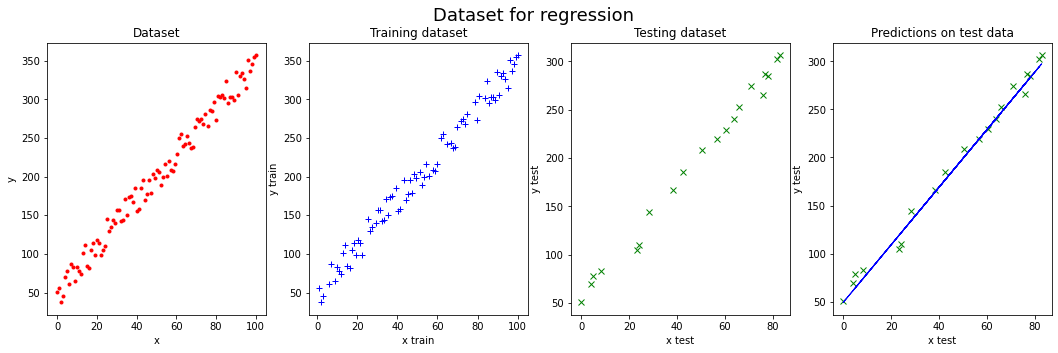

In [14]:
# Show everything:
# Set size and title of the figure:
plt.figure(figsize=(18, 5))
plt.suptitle('Dataset for regression', fontsize=18)

# Show the original dataset:
plt.subplot(1, 4, 1)
plt.plot(x, y, 'r.', label='Original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset")

# Show the training data:
plt.subplot(1, 4, 2)
plt.plot(x_train, y_train, 'b+', label='Training data')
plt.xlabel('x train')
plt.ylabel('y train')
plt.title("Training dataset")

# Show the testing data:
plt.subplot(1, 4, 3)
plt.plot(x_test, y_test, 'gx', label='Testing data')
plt.xlabel('x test')
plt.ylabel('y test')
plt.title("Testing dataset")

# Show the predictions on test data:
plt.subplot(1, 4, 4)
plt.plot(x_test, y_test, 'gx', label='Testing data')
plt.plot(x_test, y_preds, color='blue', linewidth=1, label='predicted')
plt.xlabel('x test')
plt.ylabel('y test')
plt.title("Predictions on test data")

# Show the Figure:
plt.show()

# Creating a dataset with outliers

Based on the code we have used to create the dataset in previous section of this notebook, we add some outliers. In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

In the code below, it can be seen that we add four outliers. Note also that we have reduced the number of samples `N` in the dataset, so that the dataset is more easily disturbed by few outliers.


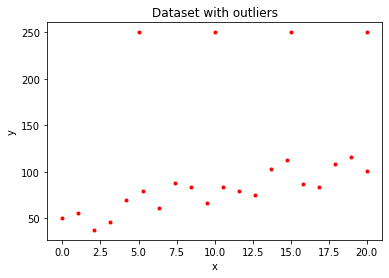

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### 1) First point is to define the data:
# Number of points, error and slope:
N = 20
ERROR = 20
SLOPE = 3
INTERCEPT = 50

# Make random numbers predictable:
np.random.seed(101)
# Generate random data composed by N points:
x = np.linspace(0, N, N).reshape(-1, 1)
y = (SLOPE * np.linspace(0, N, N) + np.random.uniform(-ERROR, ERROR, N) + INTERCEPT).reshape(-1, 1)

# Add outliers:
outlier_x = np.array([5, 10, 15, 20]).reshape(-1, 1)
outlier_y = np.array([250, 250, 250, 250]).reshape(-1, 1)
x = np.concatenate((x, outlier_x))
y = np.concatenate((y, outlier_y))

### 2) Plot the training data:
# Plot training data:
# plt.subplot(1, 2, 1)
plt.plot(x, y, 'r.', label='Original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset with outliers")
# Show the Figure:
plt.show()

# Training a linear regression

Based on the previous dataset (with some outliers), we create the linear regression object and fit the model. Note also that for simplicity, we are not going to split the dataset into training and testing sets. Therefore, all the dataset will be used for training.

In [16]:
from sklearn import linear_model

# Create linear regression object:
model = linear_model.LinearRegression()

# Train the model using all the dataset:
model.fit(x, y)

# The coefficients
print("Coefficients: {}".format(model.coef_))
print("Intercept: {}".format(model.intercept_))

# Obtain the predictions for all the dataset:
y_preds_linear_reg = model.predict(x)

Coefficients: [[4.13585402]]
Intercept: [64.72207078]


We show both the dataset and the predictions.

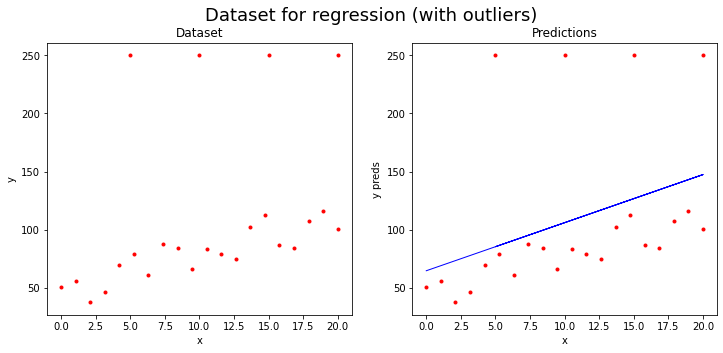

In [19]:
# Set the size and title:
plt.figure(figsize=(12, 5))
plt.suptitle('Dataset for regression (with outliers)', fontsize=18)

# Show the training data:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r.', label='Original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset")

# Show the predicted values
plt.subplot(1, 2, 2)
plt.plot(x, y, 'r.', label='Original data')
plt.plot(x, y_preds_linear_reg, color='blue', linewidth=1, label='predicted')
plt.xlabel('x')
plt.ylabel('y preds')
plt.title("Predictions")

# Show the Figure:
plt.show()

As we can see in the previous figure, the `LinearRegression` estimator is heavily influenced by the outliers, which is not good.

# Training a model robust to outliers 

There are several robust regression methods available in scikit-learn. As an example, we are going to check [Hubber Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html), which is a linear regression model that is robust to outliers.

The Hubber Regressor provided by scikit-learn includes the parameter `epsilon`. The parameter `epsilon` controls the number of samples that should be classified as outliers. The smaller the `epsilon`, the more robust it is to outliers. This parameter should be greater than `1.0`, with a default value of `1.35`.

The following piece of code creates a `HuberRegressor` estimator with a `epsilon` value of `2.0`. Then, we fit the data and make the predictions. Afterwards, we plot the obtained results.

In [25]:
from sklearn.linear_model import HuberRegressor

# Create the HuberRegressor model:
huber_regressor_model = HuberRegressor(epsilon=2.0)

# Train the model using the training sets:
huber_regressor_model.fit(x, y.ravel())

# The coefficients
print("Coefficients: {}".format(huber_regressor_model.coef_))
print("Intercept: {}".format(huber_regressor_model.intercept_))

y_preds = huber_regressor_model.predict(x)

Coefficients: [3.68934655]
Intercept: 52.26758279362693


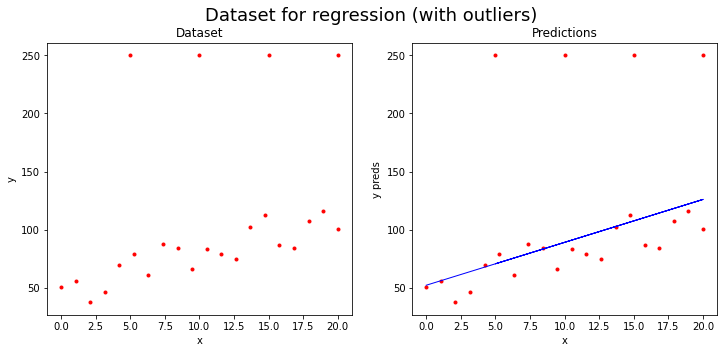

In [26]:
# Set the size and title:
plt.figure(figsize=(12, 5))
plt.suptitle('Dataset for regression (with outliers)', fontsize=18)

# Show the dataset:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r.', label='Original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset")

# Show the obtained results:
plt.subplot(1, 2, 2)
plt.plot(x, y, 'r.', label='Original data')
plt.plot(x, y_preds, color='blue', linewidth=1, label='predicted')
plt.xlabel('x')
plt.ylabel('y preds')
plt.title("Predictions")

# Show the Figure:
plt.show()

As we can see in previous figure, the obtained results are less influenced by outliers. In the previous example, we have set the parameter `epsilon` with a value of `2.0`. Let's see how the obtained results (predictions) are affected by this parameter.

In [29]:
epsilon_values = [1.0, 2.0, 2.2]

all_predictions = []

for epsilon in epsilon_values:
    huber_regressor = HuberRegressor(epsilon=epsilon)
    huber_regressor.fit(x, y.ravel())
    y_preds = huber_regressor.predict(x)
    all_predictions.append(y_preds)

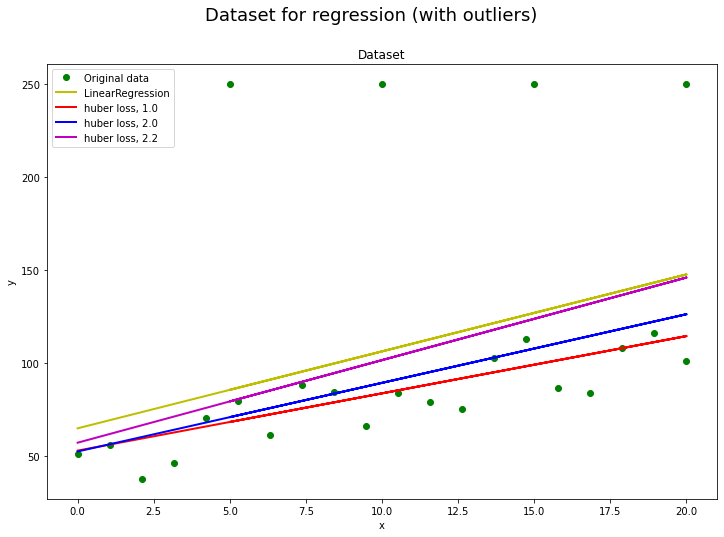

In [30]:
colors = ['r', 'b', 'm']

plt.figure(figsize=(12, 8))
plt.suptitle('Dataset for regression (with outliers)', fontsize=18)

# Plot the original data:
plt.plot(x, y, 'go', label='Original data')

# Plot the obtained results with the LinearRegression:
plt.plot(x, y_preds_linear_reg, 'y', linewidth=2, label='LinearRegression')

# Plot the HuberRegressor predictions:
for k, epsilon in enumerate(epsilon_values):
  label= "huber loss, %s" % epsilon
  plt.plot(x, all_predictions[k], color=colors[k], linewidth=2, label=label)

plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset")

plt.legend(loc=0)

# Show the Figure:
plt.show()

As we have seen, the `HuberRegressor` estimator is less influenced by the outliers. Moreover, as the parameter `epsilon` is increased for the `HuberRegressor` estimator, the obtained results get closer to the results obtained with the `LinearRegression` estimator.

# Additional example dealing with outliers 

Very similar to the example we have seen before, scikit-learn provides an example to see how to robustly fit a linear model to a dataset with outliers. In this example, they compare a [linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) estimator with a [linear_model.RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) estimator. The RANSAC regressor is very robust to outliers. This example can be seen [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html), and the code can be downloaded from [here](https://scikit-learn.org/stable/_downloads/b4762c93d453d21e5679b926dd2c532c/plot_ransac.py).

We are going to download, execute and show the previous script making use of `colaboratory-utils.download_and_execute_file()`. Therefore, we install `colaboratory-utils` using pip:



In [32]:
!pip install git+git://github.com/albertofernandezvillan/colaboratory-utils.git -q



"""
Robust linear model estimation using RANSAC

In this example we see how to robustly fit a linear model to faulty data using
the RANSAC algorithm.

"""
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, 

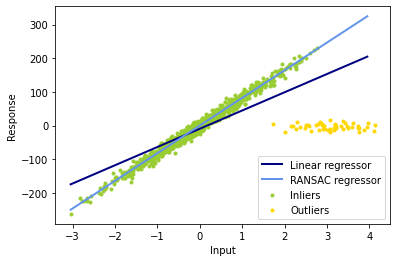

<Figure size 432x288 with 0 Axes>

In [33]:
import colaboratory_utils as colab_utils

fname = 'plot_ransac.py'
url = 'https://scikit-learn.org/stable/_downloads/b4762c93d453d21e5679b926dd2c532c/plot_ransac.py'

colab_utils.download_and_execute_file(fname, url, params= "", execute=True, show_content=True)

# Conclusions

In this notebook, we have seen an introduction to regression with scikit-learn. In this sense, we have created a toy dataset and created a `linear_model.LinearRegression` estimator. Then, we have included some outliers to this toy dataset and checked that the `linear_model.LinearRegression` is disturbed by these outliers. To deal with outliers, we have fitted a `linear_model.HuberRegressor` estimator, which includes the parameter `epsilon` that controls the number of samples that should be classified as outliers. The smaller the `epsilon`, the more robust it is to outliers. 

Finally, we have introduced `linear_model.RANSACRegressor` estimator in an example included in scikit-learn. In this example, they compare a `linear_model.LinearRegression` estimator with a `linear_model.RANSACRegressor` estimator. 

As a final note, if you want to remove outliers from your dataset, [you can check this post](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/).